In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
df = pd.read_csv('/home/ek777/Documents/Downscaling/Climate-Downscaling/KZ_paper/KZ_downscaling_code/KZ_1980_2000_GHCN.csv')

In [3]:
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,EMXP,Missing,Consecutive Missing,MXSD,...,Consecutive Missing.4,MMXT,Missing.5,Consecutive Missing.5,MMNT,Missing.6,Consecutive Missing.6,MNTM,Missing.7,Consecutive Missing.7
0,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,19530301,-9999,0,0,-9999,...,5,39,5,5,0,5,5,20,5,5
1,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,19530501,-9999,0,0,-9999,...,30,339,29,29,139,30,30,-9999,0,0
2,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,19530601,20,0,0,-9999,...,5,277,26,17,128,9,5,200,10,6
3,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,19530701,150,0,0,-9999,...,11,276,23,7,144,22,11,223,12,7
4,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,19530801,-9999,0,0,-9999,...,6,273,19,6,86,20,6,179,20,6


In [4]:
df.dtypes

STATION                   object
STATION_NAME              object
ELEVATION                  int64
LATITUDE                 float64
LONGITUDE                float64
DATE                       int64
EMXP                       int64
Missing                    int64
Consecutive Missing        int64
MXSD                       int64
Missing.1                  int64
Consecutive Missing.1      int64
TPCP                       int64
Missing.2                  int64
Consecutive Missing.2      int64
EMXT                       int64
Missing.3                  int64
Consecutive Missing.3      int64
EMNT                       int64
Missing.4                  int64
Consecutive Missing.4      int64
MMXT                       int64
Missing.5                  int64
Consecutive Missing.5      int64
MMNT                       int64
Missing.6                  int64
Consecutive Missing.6      int64
MNTM                       int64
Missing.7                  int64
Consecutive Missing.7      int64
dtype: obj

### Change DATE type into `datetime`

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'].astype(str))

In [6]:
df.dtypes

STATION                          object
STATION_NAME                     object
ELEVATION                         int64
LATITUDE                        float64
LONGITUDE                       float64
DATE                     datetime64[ns]
EMXP                              int64
Missing                           int64
Consecutive Missing               int64
MXSD                              int64
Missing.1                         int64
Consecutive Missing.1             int64
TPCP                              int64
Missing.2                         int64
Consecutive Missing.2             int64
EMXT                              int64
Missing.3                         int64
Consecutive Missing.3             int64
EMNT                              int64
Missing.4                         int64
Consecutive Missing.4             int64
MMXT                              int64
Missing.5                         int64
Consecutive Missing.5             int64
MMNT                              int64


In [7]:
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,EMXP,Missing,Consecutive Missing,MXSD,...,Consecutive Missing.4,MMXT,Missing.5,Consecutive Missing.5,MMNT,Missing.6,Consecutive Missing.6,MNTM,Missing.7,Consecutive Missing.7
0,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,1953-03-01,-9999,0,0,-9999,...,5,39,5,5,0,5,5,20,5,5
1,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,1953-05-01,-9999,0,0,-9999,...,30,339,29,29,139,30,30,-9999,0,0
2,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,1953-06-01,20,0,0,-9999,...,5,277,26,17,128,9,5,200,10,6
3,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,1953-07-01,150,0,0,-9999,...,11,276,23,7,144,22,11,223,12,7
4,GHCND:KZ000036639,URDZHAR KZ,491,47.117,81.617,1953-08-01,-9999,0,0,-9999,...,6,273,19,6,86,20,6,179,20,6


### Select certain station in certain time period

* in Pandas, you can just use .ix[ ] to select a period of time

In [8]:
almaty = df.set_index('STATION_NAME').ix['ALMATY KZ',['DATE','MNTM']]

In [9]:
ts = almaty.set_index('DATE')

In [10]:
%matplotlib inline

In [11]:
import numpy as np

In [12]:
ts = ts.replace(-9999,np.nan)/10

In [13]:
ts.head()

,MNTM
DATE,
1948-01-01,-2.7
1948-02-01,-4.8
1948-03-01,3.8
1948-04-01,9.5
1948-05-01,16.3


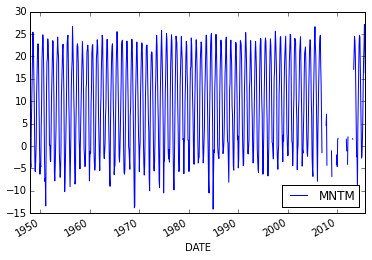

In [14]:
ts.plot()

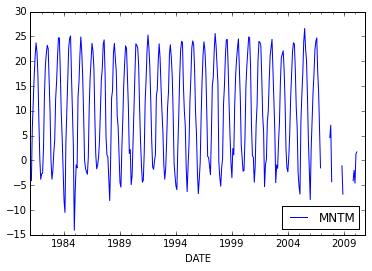

In [15]:
ts.ix['1981':'2010'].plot()

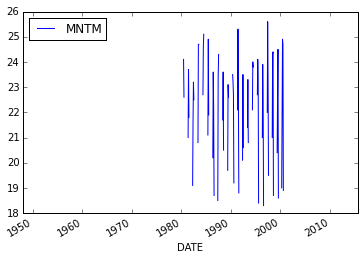

In [16]:
ts[ts.ix['1980':'2000'] > 18].plot()

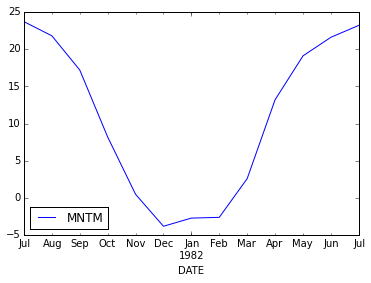

In [17]:
ts['1981-07':'1982-07'].plot()

In [18]:
almaty2 = df.set_index('STATION_NAME').ix['ALMATY KZ',['DATE','MNTM','MMXT','MMNT']]

In [19]:
ts2 = almaty2.set_index('DATE')
ts2 = ts2.replace(-9999,np.nan)/10

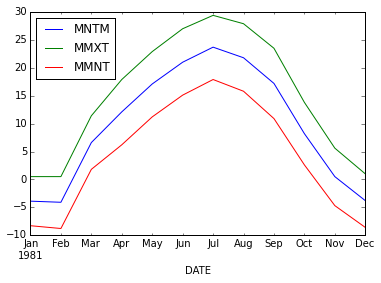

In [20]:
ts2.ix['1981'].plot()

In [21]:
ts2.ix['1981'].mean(0)

MNTM     9.700000
MMXT    15.116667
MMNT     4.258333
dtype: float64

In [22]:
ts2.describe()

,MNTM,MMXT,MMNT
count,766.000000,812.000000,792.000000
mean,9.665666,15.299384,4.458081
std,10.447608,11.148314,9.831635
min,-14.100000,-9.200000,-18.900000
25%,0.100000,4.450000,-4.325000
50%,10.400000,16.400000,5.100000
75%,19.200000,25.800000,13.700000
max,27.100000,36.300000,21.100000


### Resample

In [23]:
ts_m_a = ts2.resample('A')

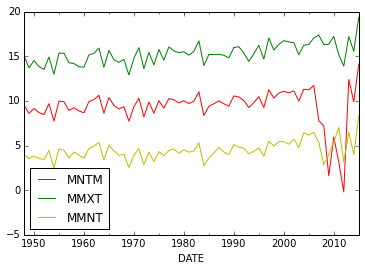

In [24]:
ts_m_a.plot(style=['r','g','y'])

### Draw a timeseries of every minimum value of half of each year

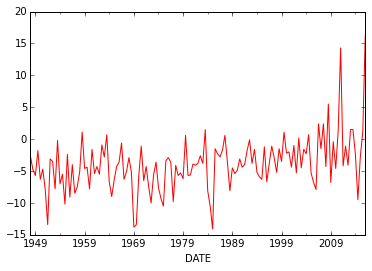

In [25]:
ts_min_6M = ts2.MNTM.resample('6M', how=min)
ts_min_6M.plot(style='r')

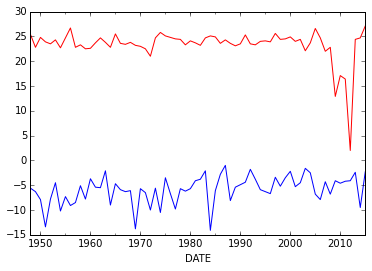

In [26]:
ts_min_A = ts.MNTM.resample('A',how=min)
ts_max_A = ts.MNTM.resample('A',how=max)
ts_max_A.plot(style='r')
ts_min_A.plot(style='b')

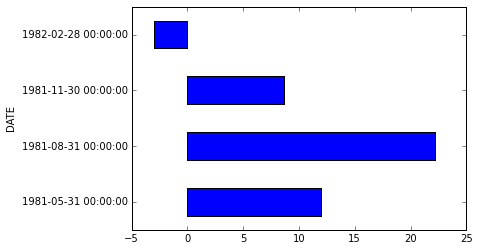

In [27]:
ts_season = ts2.ix['1981-03':'1982-02','MNTM'].resample('Q-FEB')
ts_season.plot(kind='barh')

### Reshape the table with row index as DATE and column index as STATION_NAME


* so I can use plot every station on one figure!
* use .unstack( ) to reshape

In [28]:
all_temp = df.set_index(['STATION_NAME','DATE']).ix[:,['MNTM']]

In [29]:
all_temp = all_temp.replace(-9999,np.nan)/10

In [30]:
ts3 = all_temp.unstack('STATION_NAME')
ts3.head()

MNTM                                          \
STATION_NAME ACHISAJ KZ AKKOL KZ AKKUDUK KZ AKTOBE KZ ALMATY KZ   
DATE                                                              
1948-01-01          NaN      NaN        NaN      -6.9      -2.7   
1948-02-01          NaN      NaN        NaN     -11.9      -4.8   
1948-03-01          NaN      NaN        NaN      -8.1       3.8   
1948-04-01          NaN      NaN        NaN       2.6       9.5   
1948-05-01          NaN      NaN        NaN      17.1      16.3   

                                                              \
STATION_NAME ARALSKOE MORE KZ ASTANA KZ ATBASAR KZ ATYRAU KZ   
DATE                                                           
1948-01-01               -3.7       NaN        NaN      -2.1   
1948-02-01               -6.6     -16.7      -17.9      -2.7   
1948-03-01               -3.9      -8.6      -10.6      -1.1   
1948-04-01                7.1       1.5        0.5       8.2   
1948-05-01               20.1      14.0       13.7      21.3   

                                       ...                                    \
STATION_NAME AUL TURARA RYSKULOV KZ    ...    URALSK KZ URDZHAR KZ URICKY KZ   
DATE                                   ...                                     
1948-01-01                      NaN    ...         -5.7        NaN       NaN   
1948-02-01                      NaN    ...         -9.9        NaN       NaN   
1948-03-01                      NaN    ...         -7.2        NaN       NaN   
1948-04-01                      NaN    ...          4.5        NaN       NaN   
1948-05-01                      NaN    ...         18.0        NaN       NaN   

                                                                            \
STATION_NAME ZHALPAKTAL KZ ZHALTYR KZ ZHANGIZTOBE KZ ZHARKENT KZ ZHARYK KZ   
DATE                                                                         
1948-01-01             NaN        NaN            NaN        -5.8       NaN   
1948-02-01             NaN        NaN            NaN        -7.2       NaN   
1948-03-01             NaN        NaN            3.4         4.5       NaN   
1948-04-01             NaN        NaN           10.3        11.7       NaN   
1948-05-01             NaN        NaN           14.2         NaN       NaN   

                                      
STATION_NAME ZHEZKAZGAN KZ ZLIKHA KZ  
DATE                                  
1948-01-01             NaN       NaN  
1948-02-01             NaN       NaN  
1948-03-01             NaN       NaN  
1948-04-01             5.6       NaN  
1948-05-01             NaN       NaN  

[5 rows x 56 columns]

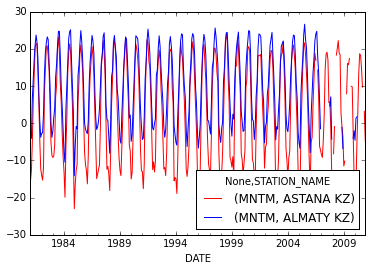

In [31]:
ts3.ix['1981':'2010',[('MNTM','ASTANA KZ'),('MNTM','ALMATY KZ')]].plot(style=['r','b'])

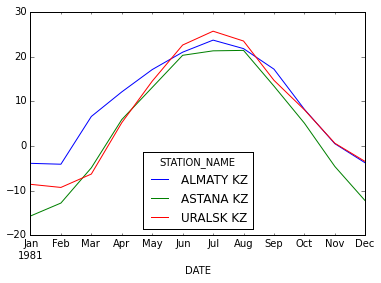

In [32]:
ts3.MNTM.ix['1981',['ALMATY KZ','ASTANA KZ','URALSK KZ']].plot(subplots=False)

In [33]:
ts3_3 = ts3.MNTM.ix['1981':'2010',['ALMATY KZ','ASTANA KZ','URALSK KZ']]

### Groupby 

* to get monthly or seasonal mean of a period of time

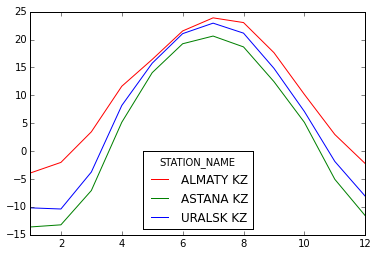

In [34]:
ts3_3.groupby(lambda x: x.month).mean().plot(style=['r','g','b'])

### Groupby Seasonal Mean

In [35]:
month_to_season_dct = {
    1: 'DJF', 2: 'DJF',
    3: 'MAM', 4: 'MAM', 5: 'MAM',
    6: 'JJA', 7: 'JJA', 8: 'JJA',
    9: 'SON', 10: 'SON', 11: 'SON',
    12: 'DJF'
}

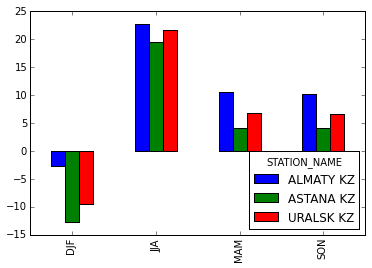

In [36]:
ts3_3.groupby(lambda x: month_to_season_dct[x.month]).mean().plot(kind='bar')

### Seaborn plotting

In [37]:
import seaborn as sns

In [38]:
missing_rank = pd.isnull(ts3.ix['1981':'2010', 'MNTM']).sum().sort_values()
missing_rank

STATION_NAME
KUSTANAI KZ                 0
KOKPEKTY KZ                 0
KAZALINSK KZ                0
IRTYSHSK KZ                 0
PETROPAVLOVSK KZ            0
SAM KZ                      0
SEMEJ KZ                    0
URALSK KZ                   0
BALHASH KZ                  0
URDZHAR KZ                  0
UIL KZ                      0
ATYRAU KZ                   0
AKKUDUK KZ                  0
AKTOBE KZ                   0
ZHARYK KZ                   0
ZHARKENT KZ                 0
ARALSKOE MORE KZ            0
KZYLZAR KZ                  0
ATBASAR KZ                  0
CARDARA KZ                  1
KYZYLORDA KZ                1
PAVLODAR KZ                 1
SEMIJARKA KZ                1
ZHEZKAZGAN KZ               2
AKKOL KZ                    3
DZHUSALY KZ                 3
ULKEN NARY KZ               4
ASTANA KZ                   6
BLACOVESCHENKA KZ           6
KARAGANDA KZ                6
ZLIKHA KZ                   9
ESIL KZ                    11
RIDDER KZ                  

In [39]:
missing_rank = missing_rank.reset_index()

In [40]:
names = missing_rank[missing_rank[0]<=28].STATION_NAME
names

0           KUSTANAI KZ
1           KOKPEKTY KZ
2          KAZALINSK KZ
3           IRTYSHSK KZ
4      PETROPAVLOVSK KZ
5                SAM KZ
6              SEMEJ KZ
7             URALSK KZ
8            BALHASH KZ
9            URDZHAR KZ
10               UIL KZ
11            ATYRAU KZ
12           AKKUDUK KZ
13            AKTOBE KZ
14            ZHARYK KZ
15          ZHARKENT KZ
16     ARALSKOE MORE KZ
17           KZYLZAR KZ
18           ATBASAR KZ
19           CARDARA KZ
20         KYZYLORDA KZ
21          PAVLODAR KZ
22         SEMIJARKA KZ
23        ZHEZKAZGAN KZ
24             AKKOL KZ
25          DZHUSALY KZ
26        ULKEN NARY KZ
27            ASTANA KZ
28    BLACOVESCHENKA KZ
29         KARAGANDA KZ
30            ZLIKHA KZ
31              ESIL KZ
32            RIDDER KZ
33    NOVYJ USHTOGAN KZ
34        DZHAMBEJTY KZ
35            URICKY KZ
36          RUZAEVKA KZ
37     MUGODZARSKAJA KZ
38          CHAPAEVO KZ
39           ZHALTYR KZ
40            ALMATY KZ
Name: STATION_NA

In [41]:
ts_good = ts3.MNTM.ix['1981':'2010',names]

In [42]:
ts_good

STATION_NAME,KUSTANAI KZ,KOKPEKTY KZ,KAZALINSK KZ,IRTYSHSK KZ,PETROPAVLOVSK KZ,SAM KZ,SEMEJ KZ,URALSK KZ,BALHASH KZ,URDZHAR KZ,...,ESIL KZ,RIDDER KZ,NOVYJ USHTOGAN KZ,DZHAMBEJTY KZ,URICKY KZ,RUZAEVKA KZ,MUGODZARSKAJA KZ,CHAPAEVO KZ,ZHALTYR KZ,ALMATY KZ
DATE,,,,,,,,,,,,,,,,,,,,,
1981-01-01,-14.5,-18.6,-6.4,-17.6,-15.6,-3.8,-15.5,-8.6,-10.0,-12.3,...,-20.0,-12.7,-4.0,-10.3,-16.9,-17.1,-13.5,-8.9,-20.2,-3.9
1981-02-01,-12.0,-17.8,-5.1,-15.4,-13.3,-3.6,-13.1,-9.3,-10.5,-14.8,...,-14.8,-13.0,-3.9,-8.7,-13.7,-15.1,-7.8,-10.0,-15.3,-4.1
1981-03-01,-6.9,-7.3,2.8,-5.0,-7.6,2.4,-2.5,-6.3,0.2,-0.3,...,-6.3,-4.0,0.3,-4.5,-6.4,-6.1,-1.9,-4.5,-7.4,6.6
1981-04-01,4.3,6.9,10.3,5.3,3.2,10.1,8.2,5.2,9.7,11.0,...,3.0,5.6,7.9,5.6,3.4,3.3,5.1,5.3,5.4,12.1
1981-05-01,12.0,14.1,16.7,13.5,11.2,16.6,15.6,14.5,16.7,17.3,...,10.7,11.8,16.2,14.4,12.5,13.1,11.9,14.3,11.9,17.1
1981-06-01,19.9,20.3,22.4,21.5,18.5,24.2,22.6,22.6,22.8,21.7,...,19.1,18.1,25.2,23.1,17.2,18.8,19.1,23.7,19.6,21.0
1981-07-01,22.3,19.9,27.8,20.4,18.9,28.9,21.1,25.7,24.5,22.1,...,21.3,16.2,27.4,26.3,21.4,20.4,25.4,25.9,20.2,23.7
1981-08-01,22.8,20.1,25.7,20.8,20.1,26.8,20.2,23.5,22.8,19.9,...,21.8,16.3,25.1,24.6,22.4,21.4,23.0,24.5,21.0,21.8
1981-09-01,13.8,12.1,17.9,13.2,11.5,19.4,14.1,14.7,16.5,15.2,...,13.2,11.5,17.2,15.3,13.1,12.4,15.1,14.2,12.4,17.2


In [43]:
ts_good.values.shape

(360, 41)

**CAUTION!**: axis-x is month (or time).

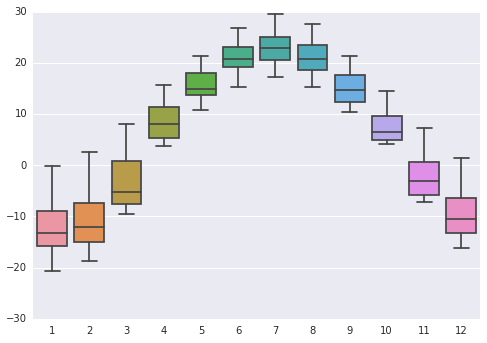

In [44]:
sns.boxplot(data=ts_good.groupby(lambda x: x.month).mean().T)

In [45]:
ts_good_value = ts_good.groupby(lambda x: month_to_season_dct[x.month]).mean()

In [57]:
ts_good_value.reindex(['MAM','JJA','SON','DJF'])

STATION_NAME,KUSTANAI KZ,KOKPEKTY KZ,KAZALINSK KZ,IRTYSHSK KZ,PETROPAVLOVSK KZ,SAM KZ,SEMEJ KZ,URALSK KZ,BALHASH KZ,URDZHAR KZ,...,ESIL KZ,RIDDER KZ,NOVYJ USHTOGAN KZ,DZHAMBEJTY KZ,URICKY KZ,RUZAEVKA KZ,MUGODZARSKAJA KZ,CHAPAEVO KZ,ZHALTYR KZ,ALMATY KZ
MAM,4.227778,3.058889,10.867778,3.507778,2.946667,10.892222,5.252222,6.723333,7.272222,6.857778,...,3.689655,3.192222,10.245977,7.394382,3.315476,3.221839,6.060920,7.631395,3.684524,10.486747
JJA,20.103333,19.417778,25.392222,19.581111,18.321111,26.288889,20.323333,21.706667,22.727778,20.713333,...,19.666667,15.975862,24.877011,22.819101,19.546512,18.605882,22.315116,22.897619,19.436471,22.811250
SON,4.402222,3.276667,9.451111,3.311111,2.646667,10.123333,4.945556,6.692222,7.213333,7.013333,...,4.067816,3.147059,9.511494,7.474118,3.273034,2.973864,6.550588,7.425287,3.679545,10.171429
DJF,-13.677778,-17.807778,-7.281111,-15.263333,-14.877778,-5.987778,-13.078889,-9.546667,-11.577778,-12.195556,...,-14.844318,-10.943678,-5.703448,-9.581176,-14.856977,-14.874699,-10.536905,-8.761905,-15.510843,-2.700000


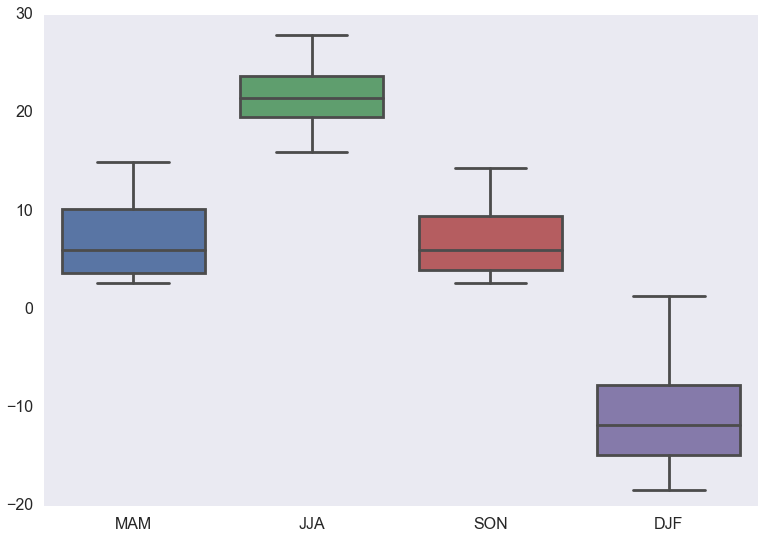

In [59]:
sns.boxplot(data=ts_good_value.reindex(['MAM','JJA','SON','DJF']).T)

In [48]:
data=ts_good.groupby(lambda x: x.month).mean().T
data
#sns.tsplot(data=data, ci=95, color="b", estimator=np.mean) 

,1,2,3,4,5,6,7,8,9,10,11,12
STATION_NAME,,,,,,,,,,,,
KUSTANAI KZ,-14.623333,-14.040000,-7.033333,5.736667,13.980000,20.030000,21.100000,19.180000,12.986667,5.416667,-5.196667e+00,-12.370000
KOKPEKTY KZ,-19.813333,-17.500000,-8.963333,4.826667,13.313333,18.413333,20.766667,19.073333,12.276667,4.296667,-6.743333e+00,-16.110000
KAZALINSK KZ,-8.673333,-7.180000,1.196667,12.170000,19.236667,24.896667,26.686667,24.593333,17.760000,9.633333,9.600000e-01,-5.990000
IRTYSHSK KZ,-16.570000,-15.560000,-8.063333,4.913333,13.673333,19.243333,21.066667,18.433333,11.986667,4.540000,-6.593333e+00,-13.660000
PETROPAVLOVSK KZ,-15.706667,-15.056667,-7.793333,3.896667,12.736667,18.133333,19.623333,17.206667,10.953333,4.226667,-7.240000e+00,-13.870000
SAM KZ,-7.090000,-6.323333,1.366667,12.210000,19.100000,25.213333,27.773333,25.880000,18.563333,10.006667,1.800000e+00,-4.550000
SEMEJ KZ,-14.566667,-13.306667,-5.723333,6.800000,14.680000,19.813333,21.706667,19.450000,12.860000,5.893333,-3.916667e+00,-11.363333
URALSK KZ,-10.170000,-10.376667,-3.753333,8.170000,15.753333,21.050000,22.930000,21.140000,14.833333,7.096667,-1.853333e+00,-8.093333
BALHASH KZ,-13.216667,-12.026667,-3.213333,8.693333,16.336667,22.013333,24.010000,22.160000,15.496667,7.513333,-1.370000e+00,-9.490000


In [49]:
import matplotlib.pyplot as plt

In [50]:
t=range(1,13)
data = data.T
y_mean = data.values.mean(axis=1)
y_std = data.values.std(axis=1)
y_std

In [55]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

/home/ek777/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


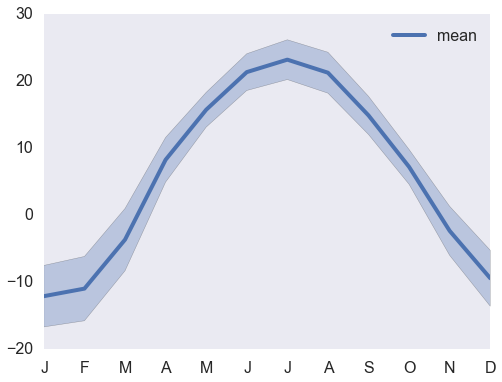

In [56]:
sns.set_style('dark')
sns.set_context('poster')


fig, ax = plt.subplots(1,figsize=(8,6))

ax.plot(t,y_mean,lw=4,label='mean')

ax.fill_between(t,y_mean+y_std,y_mean-y_std, alpha=0.3, label='std')

ax.set_xlim([1,12])

ax.set_xticks(range(1,13))
ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])

ax.legend()